In [12]:
import os
for year in range(2007,2020):
    command = 'curl https://markets.cboe.com/us/equities/market_statistics/historical_market_volume/market_history_monthly_'+str(year)+'.csv-dl -o '+str(year)+'.csv'
    os.system(command)

In [81]:
import pandas as pd

data_us_stock = pd.DataFrame()
for year in range(2009, 2020):
    year_data = pd.read_csv(str(year) + '.csv', index_col = 0)
    data_us_stock = pd.concat([data_us_stock, year_data], axis = 0)

In [82]:
us_shares_data = data_us_stock[['Market Participant', 'Total Notional']]

In [83]:
us_shares_data.index = pd.to_datetime(us_shares_data.index)

In [84]:
us_share_data_mkt = pd.pivot_table(data=us_shares_data, index=us_shares_data.index ,  values='Total Notional', columns='Market Participant')
us_share_data_mkt 

Market Participant,ADF (D),AMEX (A),BATS (Z),BATS BYX (Y),BATS BZX (Z),BEX (B),BYX Equities (Y),BZX Equities (Z),CBOE (W),CBSX (W),...,NASDAQ PSX (X),NSX (C),NYSE (DN),NYSE (N),NYSE American (A),NYSE Arca (P),NYSE Chicago (M),NYSE MKT (A),NYSE National (C),PSX (X)
2009-01-01,2.618864e+10,9.998682e+08,5.691639e+11,NaN,NaN,1.743110e+09,NaN,NaN,1.439838e+10,NaN,...,NaN,2.377655e+10,6.437111e+09,5.960954e+11,NaN,9.084396e+11,NaN,NaN,NaN,NaN
2009-02-01,2.433576e+10,9.743720e+08,6.122327e+11,NaN,NaN,8.040033e+09,NaN,NaN,1.233095e+10,NaN,...,NaN,2.593532e+10,5.555267e+09,5.664896e+11,NaN,9.359273e+11,NaN,NaN,NaN,NaN
2009-03-01,2.512318e+10,1.169102e+09,7.125734e+11,NaN,NaN,2.740838e+10,NaN,NaN,1.269953e+10,NaN,...,NaN,3.049417e+10,9.105434e+09,6.815165e+11,NaN,1.079882e+12,NaN,NaN,NaN,NaN
2009-04-01,2.300746e+10,1.149805e+09,5.496113e+11,NaN,NaN,4.885500e+10,NaN,NaN,1.260811e+10,NaN,...,NaN,2.911830e+10,1.035588e+10,6.487359e+11,NaN,9.392231e+11,NaN,NaN,NaN,NaN
2009-05-01,1.882642e+10,1.204058e+09,5.314119e+11,NaN,NaN,5.095732e+10,NaN,NaN,1.228710e+10,NaN,...,NaN,2.925264e+10,1.329061e+10,6.490793e+11,NaN,8.807696e+11,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,NaN,NaN,NaN,NaN,NaN,NaN,2.216313e+11,5.508091e+11,NaN,NaN,...,7.381226e+10,NaN,NaN,8.673126e+11,1.535991e+10,7.209839e+11,5.320213e+10,NaN,5.936075e+10,NaN
2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,1.857662e+11,4.397049e+11,NaN,NaN,...,5.992285e+10,NaN,NaN,8.551465e+11,1.324812e+10,5.739386e+11,5.626988e+10,NaN,6.385961e+10,NaN
2019-10-01,NaN,NaN,NaN,NaN,NaN,NaN,1.843402e+11,4.733236e+11,NaN,NaN,...,5.381896e+10,NaN,NaN,8.405879e+11,1.142668e+10,6.527866e+11,5.407092e+10,NaN,6.852545e+10,NaN
2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN,1.538033e+11,4.004621e+11,NaN,NaN,...,4.223947e+10,NaN,NaN,8.067985e+11,1.026034e+10,5.320518e+11,5.699140e+10,NaN,6.060711e+10,NaN


In [85]:
us_share_data_mkt.dropna(axis = 1, how = 'all', inplace = True)
us_share_data_mkt.fillna(us_share_data_mkt.median(axis = 1))
total_stock_month = us_share_data_mkt.sum(axis = 1)

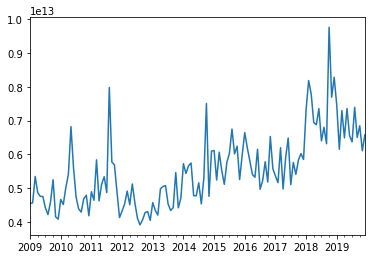

In [86]:
import matplotlib.pyplot as plt
total_stock_month.plot()
plt.show()

In [87]:
month_data = pd.read_csv('Price_index.csv',index_col = 0)

In [88]:
month_data.columns = ['price']
month_data['delta'] = ((month_data['price'] - month_data['price'].shift(12))/month_data['price']) * 100 * 20

In [89]:
month_data.index = pd.to_datetime(month_data.index)

In [90]:
total_stock_month = pd.DataFrame(total_stock_month, columns = ['Total Volume'])
total_stock_month

,Total Volume
2009-01-01,4.546911e+12
2009-02-01,4.566379e+12
2009-03-01,5.347006e+12
2009-04-01,4.867385e+12
2009-05-01,4.757571e+12
...,...
2019-08-01,7.391349e+12
2019-09-01,6.499712e+12
2019-10-01,6.846038e+12
2019-11-01,6.107132e+12


In [91]:
stock_and_inflation = month_data.join(total_stock_month, how = 'inner')

In [92]:
stock_and_inflation

,price,delta,Total Volume
2009-01-01,211.933,-2.274304,4.546911e+12
2009-02-01,212.705,0.169248,4.566379e+12
2009-03-01,212.495,-8.969623,5.347006e+12
2009-04-01,212.709,-11.593304,4.867385e+12
2009-05-01,213.022,-20.523702,4.757571e+12
...,...,...,...
2019-08-01,256.118,34.226411,7.391349e+12
2019-09-01,256.532,33.906101,6.499712e+12
2019-10-01,257.387,34.873556,6.846038e+12
2019-11-01,257.989,40.055971,6.107132e+12


In [93]:
stock_and_inflation['Delta Volume'] = 100* (stock_and_inflation['Total Volume']  - stock_and_inflation['Total Volume'].shift(12))/stock_and_inflation['Total Volume']
stock_and_inflation

,price,delta,Total Volume,Delta Volume
2009-01-01,211.933,-2.274304,4.546911e+12,NaN
2009-02-01,212.705,0.169248,4.566379e+12,NaN
2009-03-01,212.495,-8.969623,5.347006e+12,NaN
2009-04-01,212.709,-11.593304,4.867385e+12,NaN
2009-05-01,213.022,-20.523702,4.757571e+12,NaN
...,...,...,...,...
2019-08-01,256.118,34.226411,7.391349e+12,7.986346
2019-09-01,256.532,33.906101,6.499712e+12,2.852712
2019-10-01,257.387,34.873556,6.846038e+12,-42.552503
2019-11-01,257.989,40.055971,6.107132e+12,-25.923114


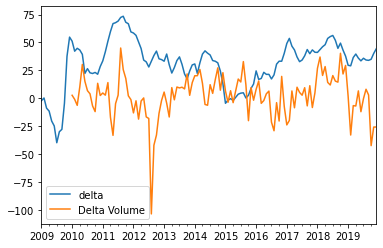

In [94]:
stock_and_inflation['delta'].plot()
stock_and_inflation['Delta Volume'].plot()
plt.legend()
plt.show()

In [98]:
stock_and_inflation['Delta Volume'].dropna(axis = 0)

2010-01-01     2.589696
2010-02-01    -1.076250
2010-03-01    -6.436835
2010-04-01    10.095020
2010-05-01    30.257799
                ...    
2019-08-01     7.986346
2019-09-01     2.852712
2019-10-01   -42.552503
2019-11-01   -25.923114
2019-12-01   -25.854278
Name: Delta Volume, Length: 120, dtype: float64

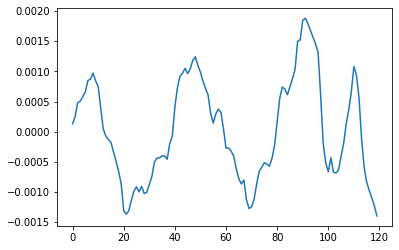

In [112]:
import numpy as np
a = (stock_and_inflation['delta'] - stock_and_inflation['delta'].mean())/(stock_and_inflation['delta'].std() * len(stock_and_inflation['delta']))
b = (stock_and_inflation['Delta Volume'] - stock_and_inflation['Delta Volume'].mean())/(stock_and_inflation['Delta Volume'].std() * len(stock_and_inflation['Delta Volume']))
result = np.correlate(a,b, mode='full')
plt.plot(result)
plt.show()